# Lit MD
Literature review in mark down. Make notes in a markdown document as you read papers, mark them with a few simple tags and make it easy to compile these documents into a review based on their user defined tags.

In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx
import itertools

%load_ext rpy2.ipython

C:\Users\david\Miniconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
papers = os.listdir("papers")

# All tags

In [3]:
tag_list = list()

for paper in papers:
    print(paper)
    file = "papers/" + paper
    with open(file, "r") as f:
        lines=f.readlines()
    #Index of tag start and end
    tagi = [i for i,line in enumerate(lines) if "tags" in line]
    tags = lines[tagi[0]+1 : tagi[-1]]
    #Remove new line character
    tags = [tag[:-1] for tag in tags]
    tag_list.append(tags)# = tag_list + tags
    
#Flatten tag_list
flat_tag_list = [tag for paper_tags in tag_list for tag in paper_tags]

A Beginner’s Guide to Phylogenetics.md
A comparison of association methods for cytotoxicity mapping in pharmacogenomics.md
A Double-Inactivated Severe Acute Respiratory Syndrome Coronavirus Vaccine Provides Incomplete.md
A dynamic COVID-19 immune signature includes associations with poor prognosis.md
A General Empirical Model of Protein Evolution Derived from Multiple Protein Families Using a Maximum-Likelihood Approach.md
A guide to vaccinology from basic principles to new developments.md
A human coronavirus evolves antigenically to escape antibody immunity.md
A pan-coronavirus fusion inhibitor targeting the HR1 domain of human coronavirus spike.md
A Phylogeny-Based Global Nomenclature System and Automated Annotation Tool for H1 Hemagglutinin Genes from Swine Influenza A Viruses.md
A pneumonia outbreak associated with a new coronavirus of probable bat origin.md
A prefusion SARS-CoV-2 spike RNA vaccine is highly immunogenic and prevents lung infection in non-human primates.md
A SARS-Co

Recent endemic coronavirus infection is associated with less severe COVID-19.md
Recent insights into the development of therapeutics against coronavirus diseases by targeting N protein.md
Reduction and Functional Exhaustion of T Cells in Patients with Coronavirus Disease 2019 (COVID-19).md
Replicating bacterium-vectored vaccine expressing SARS-CoV-2 Membrane and Nucleocapsid proteins protects against severe COVID-19 disease in hamsters.md
Replication-competent vesicular stomatitis virus vaccine vector protects against SARS-CoV-2-mediated pathogenesis..md
Safety and immunogenicity of the ChAdOx1 nCoV-19 vaccine against SARS-CoV-2 a preliminary report of a phase 1 2, single-blind, randomised controlled trial..md
SARS-CoV-2 501Y . V2 escapes neutralization by South African COVID-19 donor plasma.md
SARS-CoV-2 Antibody Avidity Responses in COVID-19 Patients and Convalescent Plasma Donors.md
SARS-CoV-2 escape in vitro from a highly neutralizing COVID-19 convalescent plasma.md
SARS-CoV-2-reac

In [4]:
alphabetised_list = pd.Series(flat_tag_list).value_counts().sort_index()
print(alphabetised_list)
alphabetised_list.to_csv("tag_summary.csv", header=False)

                                  5
ADE                               2
MHC processing                    3
MHC_processing                    1
ancestral_reconstruction          8
antibody                          9
antigen                          12
assay_prediction                  5
coronavirus                      70
crossreactive                     8
epitope                          14
epitope prediction                6
epitope_prediction                1
flu-vaccine                      16
flu_evolution                     5
hemagglutinin                     5
immune correlates                 2
immune response                  14
indels                            4
machine learning                  2
machine_learning                 20
machines learning                 1
phylogenetic non-independence     1
phylogenetics                     7
sequence_alignment                3
statistics                        8
substitution_matrix               2
vaccine                     

# Create review
Specify a list of tags to keep for the review.

In [5]:
review_name = "flu_review"
review_name = "reviews/%s.md" %(review_name)
keep_tags = ["flu-vaccine," "flu_evolution","epitope"]

In [6]:
#Print paper names
for paper in papers:
    file = "papers/" + paper
    with open(file, "r") as f:
        lines=f.readlines()
    #Index of tag start and end
    tagi = [i for i,line in enumerate(lines) if "tags" in line]
    tags = lines[tagi[0]+1 : tagi[-1]]
    #Remove new line character
    tags = [tag[:-1] for tag in tags]
    tag_list = tag_list + tags
    if any(tag in keep_tags for tag in tags):
        print(paper,"\n", tags,"\n")

A sequence homology and bioinformatic approach can predict candidate targets for immune responses to SARS-CoV-2.md 
 ['coronavirus', 'vaccine design', 'epitope', 'epitope prediction'] 

An Introduction to B-Cell Epitope Mapping and In Silico.md 
 ['epitope', 'antigen', 'flu-vaccine', 'ancestral_reconstruction'] 

An overview of bioinformatics tools for epitope prediction Implications on vaccine development.md 
 ['epitope_prediction', 'epitope', 'machine_learning'] 

Antigenic sites of H1N1 influenza virus hemagglutinin revealed by natural isolates and inhibition assays.md 
 ['epitope', 'flu_evolution', 'hemagglutinin'] 

Complete mapping of mutations to the SARS-CoV-2 spike receptor-binding domain that escape antibody recognition.md 
 ['virus evolution', 'epitope'] 

Epitope Discovery and Synthetic Vaccine Design.md 
 ['epitope', 'vaccine design'] 

H1N1 influenza virus epitopes classified by monoclonal antibodies.md 
 ['antibody', 'epitope', 'vaccine design', 'flu-vaccine'] 

HLA Clas

In [7]:
with open(review_name, "w") as review:
    review.write("# Review of: %s\n" %(", ".join(keep_tags)))
        
for paper in papers:
    file = "papers/" + paper
    with open(file, "r") as f:
        lines=f.readlines()
    #Index of tag start and end
    tagi = [i for i,line in enumerate(lines) if "tags" in line]
    tags = lines[tagi[0]+1 : tagi[-1]]
    #Remove new line character
    tags = [tag[:-1] for tag in tags]
    if any(tag in keep_tags for tag in tags):
        with open(review_name, "a") as review:
            review.writelines(lines)
            review.write("\n")

## Custom review
Create a review of specified papers. Each list of custom papers should be kept so it can be updated later without having to enter all the papers again.

In [8]:
review_name = "COVID_and_CCC"
review_name = "reviews/%s.md" %(review_name)

custom_papers = [
    "Recent endemic coronavirus infection is associated with less severe COVID-19.md",
    "A systematic review of antibody mediated immunity to coronaviruses antibody kinetics, correlates of protection, and association of antibody responses with severity of disease.md",
    "Antibody responses to endemic coronaviruses modulate COVID-19 convalescent plasma functionality.md",
    "Preexisting and de novo humoral immunity to SARS-CoV-2 in humans.md",
    "SARS-CoV-2-reactive T cells in healthy donors and patients with COVID-19.md",
    "Selective and cross-reactive SARS-CoV-2 T cell epitopes in unexposed humans.md",
    "Cross-reactive antibody responses against SARS-CoV-2 and seasonal common cold coronaviruses.md",
    "Analysis of Humoral Immune Responses in Patients With Severe Acute Respiratory Syndrome Coronavirus 2 Infection.md"
]

In [9]:
with open(review_name, "w") as review:
    review.write("# Review of: %s\n" %(review_name))
    
for paper in custom_papers:
    file = "papers/" + paper
    with open(file, "r") as f:
        lines=f.readlines()
    with open(review_name, "a") as review:
        review.writelines(lines)
        review.write("\n")

# Knowledge graph
Create a network graph of the tags and their conections to each other.

In [25]:
#Format data

#unique tags
utag = set(flat_tag_list)
#Create a dataframe listing all possible pairs and the number of times that pair occurs
tag_pairs = pd.DataFrame(list(itertools.combinations(utag, 2)),
                         columns = ['tag1', 'tag2'])
tag_pairs['links'] = 0

# count the number of occurences of each pair
for paper_tags in tag_list:
    within_paper_combinations = list(itertools.combinations(paper_tags, 2))
    for pair in within_paper_combinations:
        tag_pairs.loc[tag_pairs.tag1.isin(pair) & tag_pairs.tag2.isin(pair),'links'] += 1

tag_edges = tag_pairs[tag_pairs.links>0]
tag_edges['links_weight'] = tag_edges.links*2
tag_nodes = pd.Series(flat_tag_list).value_counts()

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


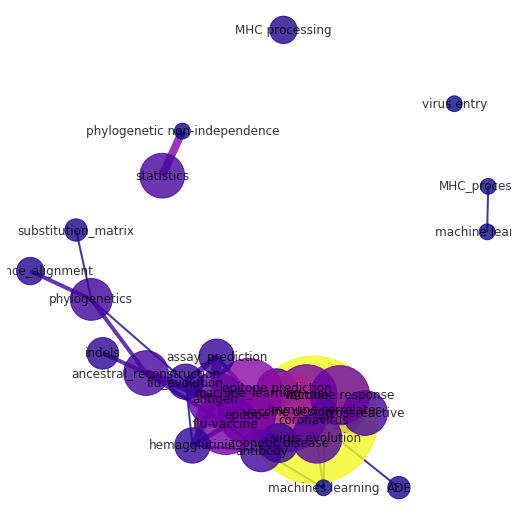

In [26]:
#Change plot size
plt.rcParams["figure.figsize"] = (7,7)

#Create a graph of the tag_pairs
netplot = nx.from_pandas_edgelist(tag_edges, "tag1", "tag2", ['links','links_weight'])
#Add nodes which have no connections
netplot.add_nodes_from(tag_nodes.index)
#Update nodes dataframe to match the graph order so we can use the counts
tag_nodes = tag_nodes.reindex(netplot.nodes())

nx.draw(netplot, with_labels=True, font_size=12,
    #edges
    edge_color=tag_edges.links, width=tag_edges.links*2, edge_cmap=plt.cm.plasma,
    #nodes
    node_size=tag_nodes*1000, node_shape=".", alpha=0.8, node_color=tag_nodes, cmap=plt.cm.plasma,
    #layout
    pos=nx.spring_layout(netplot, iterations=1000, scale=50, k=10, weight='links_weight'))

In [27]:
# #Change plot size
# plt.rcParams["figure.figsize"] = (7,7)

# #Create a graph of the tag_pairs
# netplot = nx.from_pandas_edgelist(tag_edges, "tag1", "tag2", ['links','links_weight'])
# #Add nodes which have no connections
# netplot.add_nodes_from(tag_nodes.index)
# #Update nodes dataframe to match the graph order so we can use the counts
# tag_nodes = tag_nodes.reindex(netplot.nodes())

# fig = plt.figure()
# nx.draw(netplot,
#     #labels    
#     with_labels=True, font_size=12, font_color="white", font_weight="bold",
#     #edges
#     edge_color=tag_edges.links, width=tag_edges.links*2, edge_cmap=plt.cm.plasma,
#     #nodes
#     node_size=tag_nodes*1000, node_shape=".", alpha=0.8, node_color=tag_nodes, cmap=plt.cm.plasma,
#     #layout
#     pos=nx.spring_layout(netplot, iterations=1000, scale=50, k=10, weight='links_weight'))
# fig.set_facecolor("#00000f")

In [28]:
#Save data for importing into R
tag_edges.to_csv("litmd_edges.csv", index=False)
tag_nodes = tag_nodes.reset_index()
tag_nodes.columns = ["name", "count"]
tag_nodes.to_csv("litmd_nodes.csv", index=False)

In [29]:
%%R
library(networkD3)
library(ggplot2)
#Load data
tag_nodes <- read.csv("litmd_nodes.csv")
tag_edges <- read.csv("litmd_edges.csv")

#Reformat
tag_nodes <- tag_nodes[order(tag_nodes$name),]
rownames(tag_nodes) <- 1:nrow(tag_nodes)
tag_edges$tagn1 <- match(tag_edges$tag1, tag_nodes$name)-1
tag_edges$tagn2 <- match(tag_edges$tag2, tag_nodes$name)-1

#Equally sized group bins
tag_nodes$group <- cut(tag_nodes$count, 3)
# Equally size groups
# tag_nodes$group <- cut_number(tag_nodes$count, 3)

#Plot
forceNetwork(Links=tag_edges, Nodes=tag_nodes,
            Source='tagn1', Target='tagn2', Value='links',
            NodeID='name', Group='group', Nodesize='count',
            radiusCalculation = JS("(d.nodesize)+6"), linkDistance = 300,
             opacity=0.8, fontSize=20, charge =-50, legend=T)